# plt-mpl

In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

## Some "Black Magic" Tricks

In [2]:
plt.rcParams['font.size'] = 20

In [3]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(
    color=['hotpink', '#008000']
)

## Plots

In [4]:
x = np.linspace(0, 1, 10)
y = 2 * np.sin(x)

### One

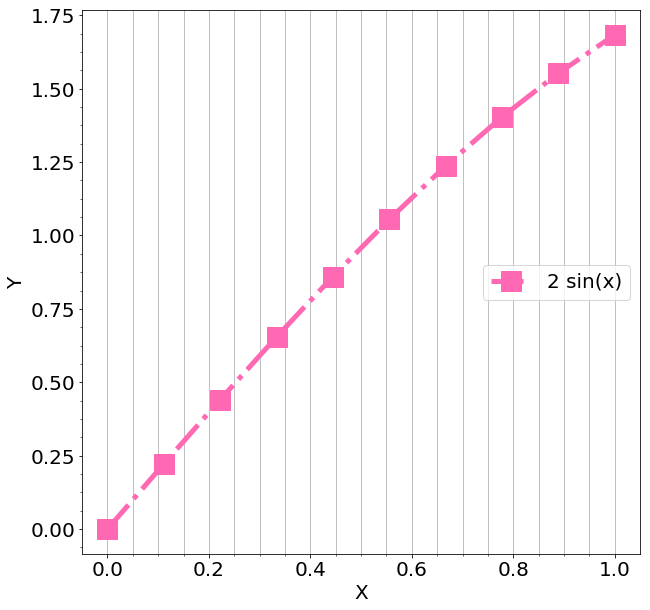

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))


ax.plot(
    x, y, 
    linewidth=5,
    label='2 sin(x)',
    marker='s',
    markersize=20,
    linestyle='-.'
)


plt.xlabel('X')
plt.ylabel('Y')

plt.legend(loc='center right')

plt.minorticks_on()
plt.grid(which='both', axis='x', zorder=10)

fig.savefig('plot.svg')

plt.show()

### Two

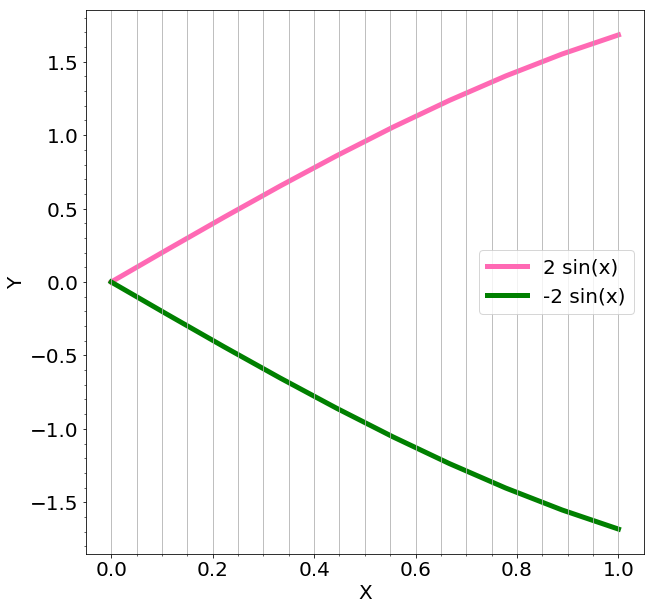

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))


ax.plot(
    x, y, 
    linewidth=5,
    label='2 sin(x)',
    zorder=0
)

ax.plot(
    x, -y, 
    linewidth=5,
    label='-2 sin(x)',
    zorder=0
)


plt.xlabel('X')
plt.ylabel('Y')

plt.legend(loc='center right')


plt.minorticks_on()
plt.grid(which='both', axis='x', zorder=10)

plt.show()

### Many

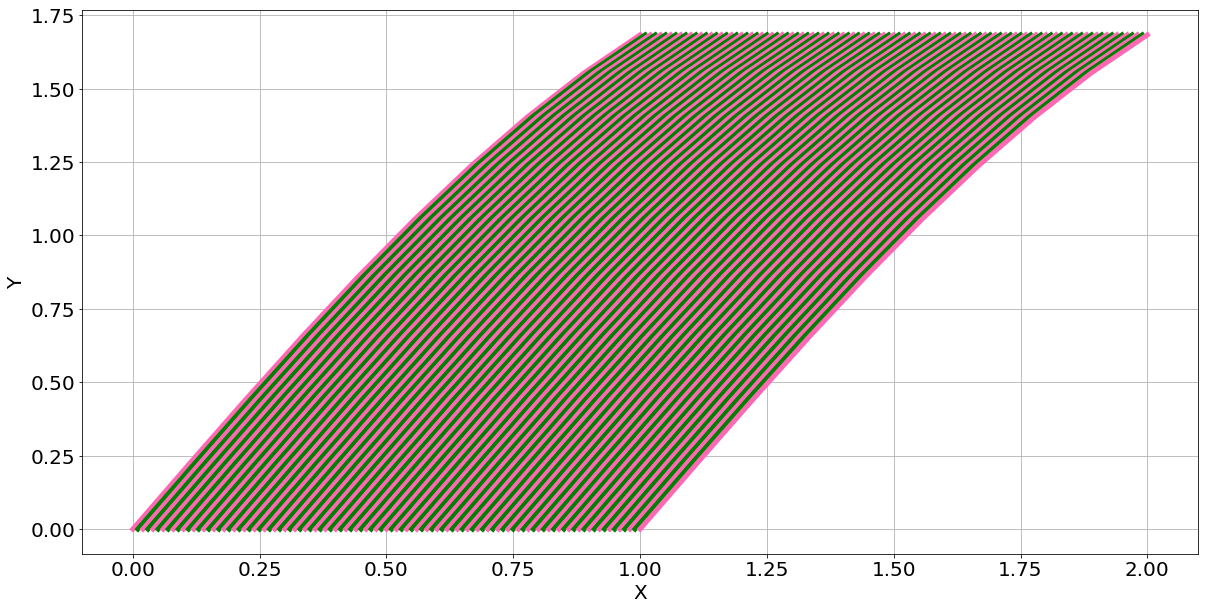

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))


for shift in np.arange(0, 101):
    plt.plot(
        x + shift/100, y, 
        linewidth=5,
    )


plt.xlabel('X')
plt.ylabel('Y')

plt.grid()

plt.show()

### Subplots

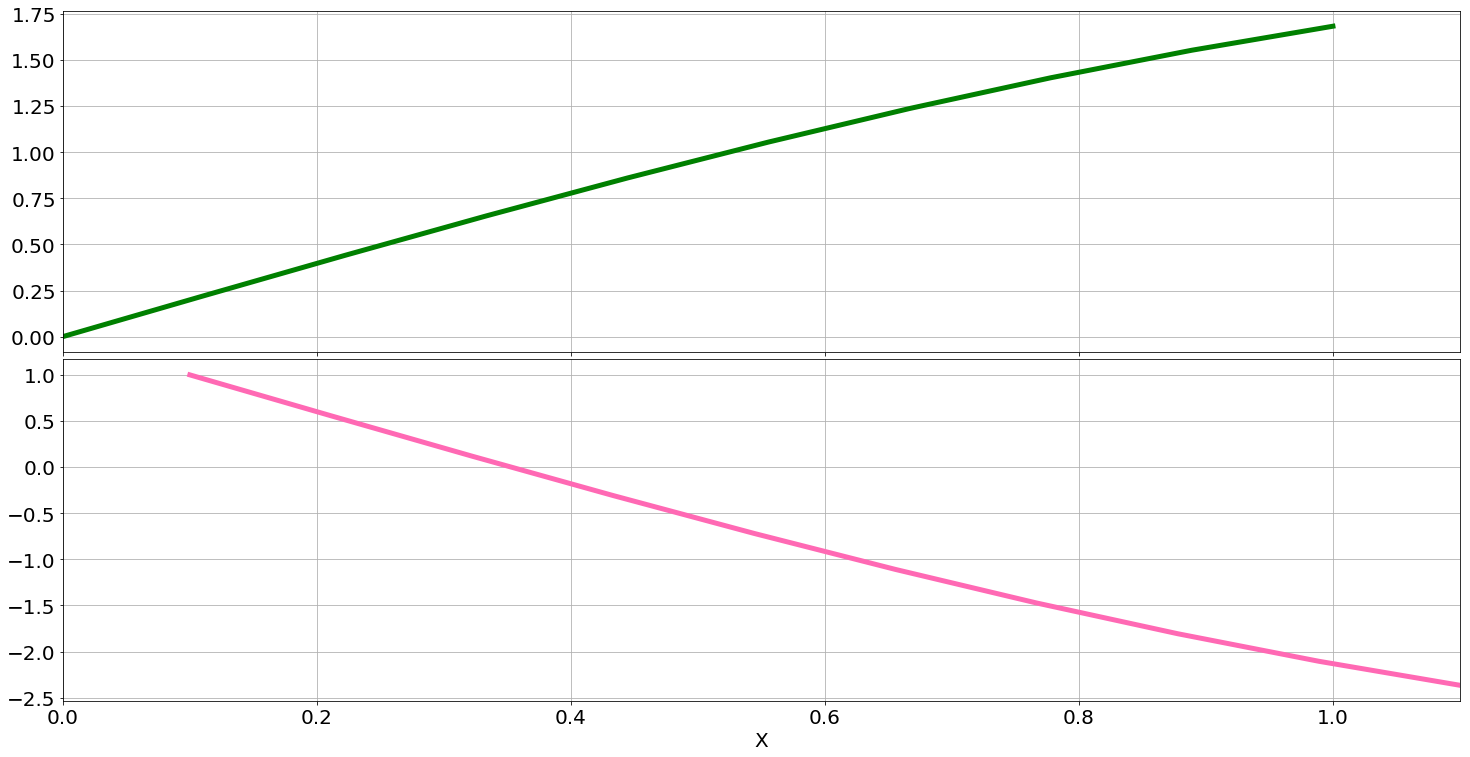

In [8]:
fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(20, 10)
)


ax = axes[0]

ax.plot(
    x, y, 
    linewidth=5,
    color='green'
)

ax.set_xlim(0, 1.1)
ax.set_xticklabels([])

ax.grid()


ax = axes[1]

ax.plot(
    x + 0.1, -2 * y + 1, 
    linewidth=5,
)

ax.set_xlim(0, 1.1)


plt.tight_layout(pad=0.01)
plt.grid()

ax.set_xlabel('X')


plt.show()

### Twins

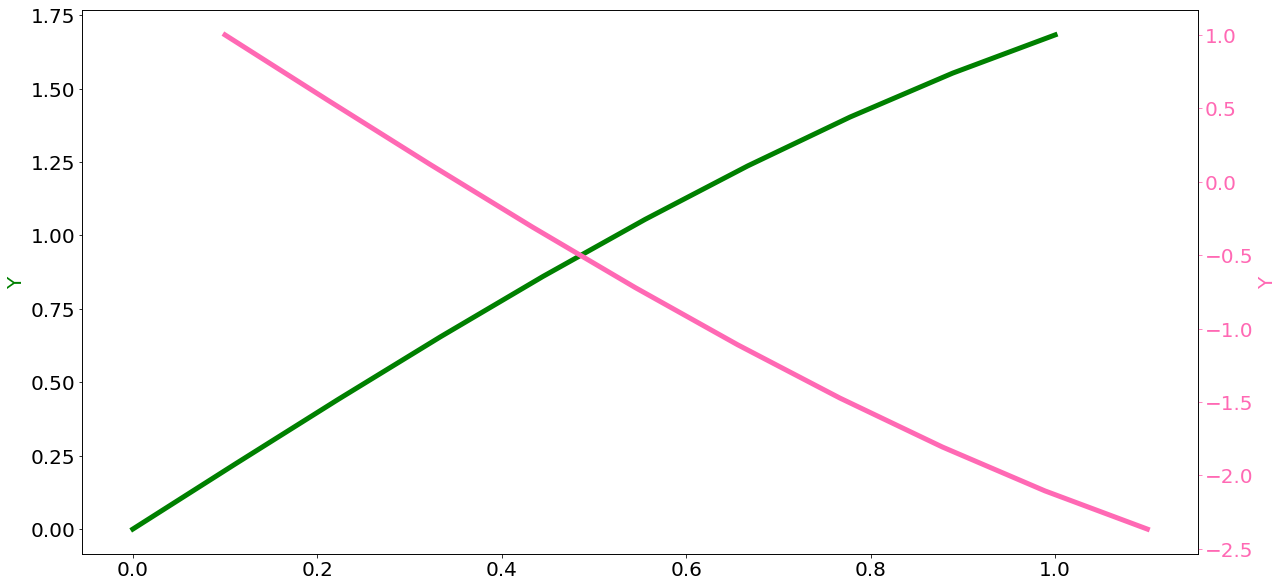

In [9]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(20, 10)
)


ax.plot(
    x, y, 
    linewidth=5,
    color='green'
)

ax.set_ylabel('Y', color='green')


ax2 = ax.twinx()

ax2.plot(
    x + 0.1, -2 * y + 1,
    linewidth=5,
    color='hotpink'
)

ax2.set_ylabel('Y', color='hotpink')
ax2.tick_params(axis='y', colors='hotpink')

plt.show()

### Scatter

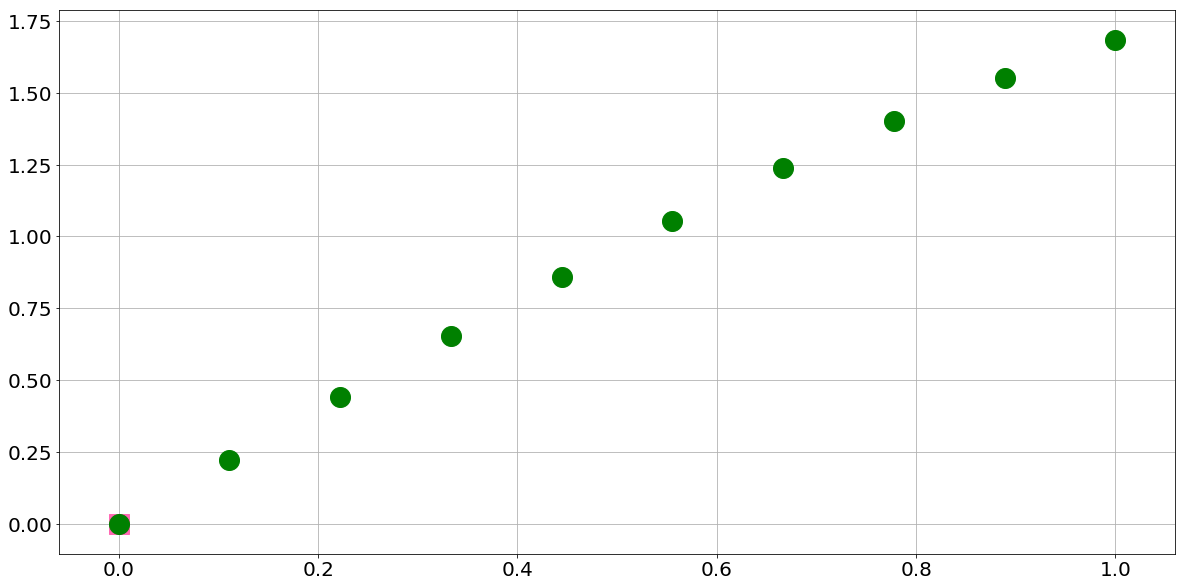

In [10]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(20, 10)
)


ax.scatter(
    x, y,
    s=400,
    color='green',
    zorder=10
)

ax.plot(
    [0], [0],
    marker='s',
    markersize=20,
    color='hotpink'
)


plt.grid()
plt.show()

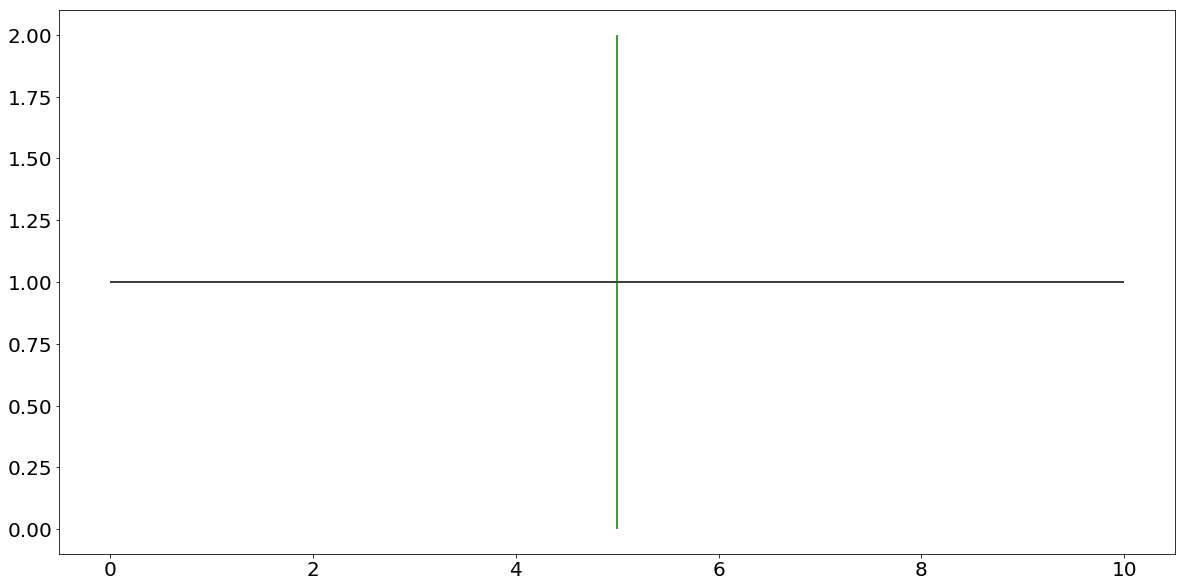

In [11]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(20, 10)
)

plt.hlines(1, 0, 10)
plt.vlines(5, 0, 2, color='green')

plt.show()

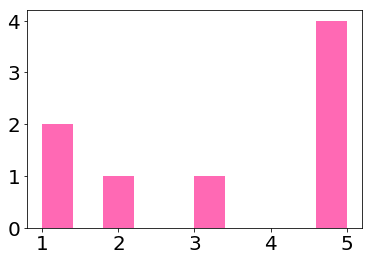

In [12]:
_ = plt.hist([1, 1, 2, 3, 5, 5, 5, 5])

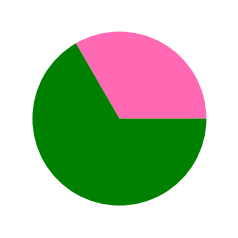

In [13]:
_ = plt.pie([1, 2])

## Pandas Section

In [14]:
import os
import warnings

import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [19]:
# https://github.com/Yorko/mlcourse.ai/blob/main/data/beauty.csv

DATA_PATH = os.path.join('data', 'beauty.csv')

In [20]:
pd.read_csv(DATA_PATH, nrows=2, sep=';')

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3


In [21]:
df = pd.read_csv(DATA_PATH, sep=';')

df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


### Examples

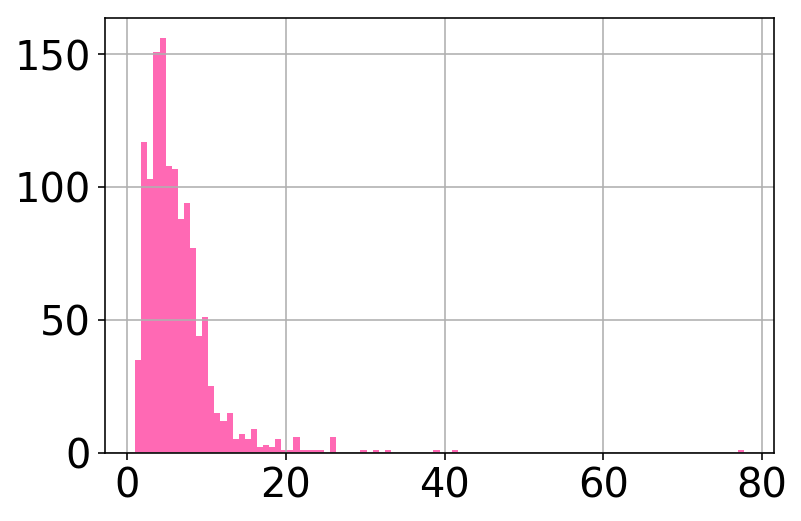

In [22]:
obj = df['wage'].hist(figsize=(6, 4), bins=100)

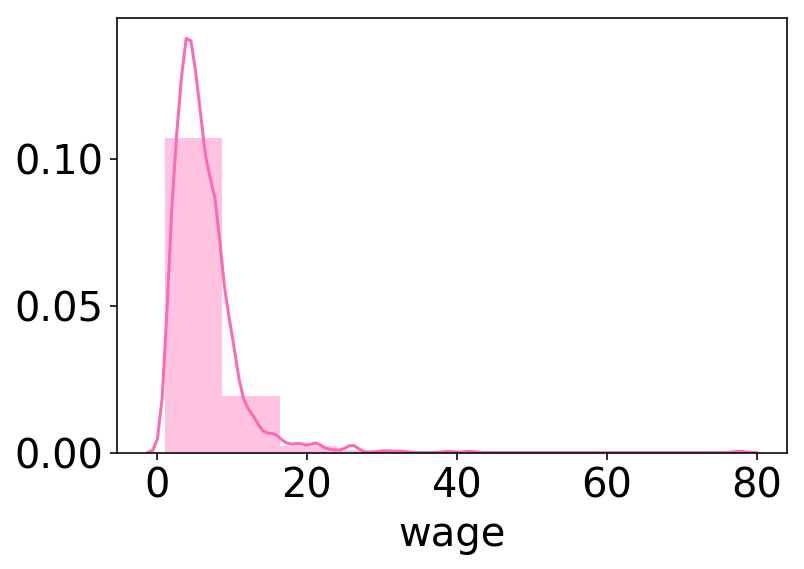

In [23]:
_ = sns.distplot(df['wage'], bins=10)

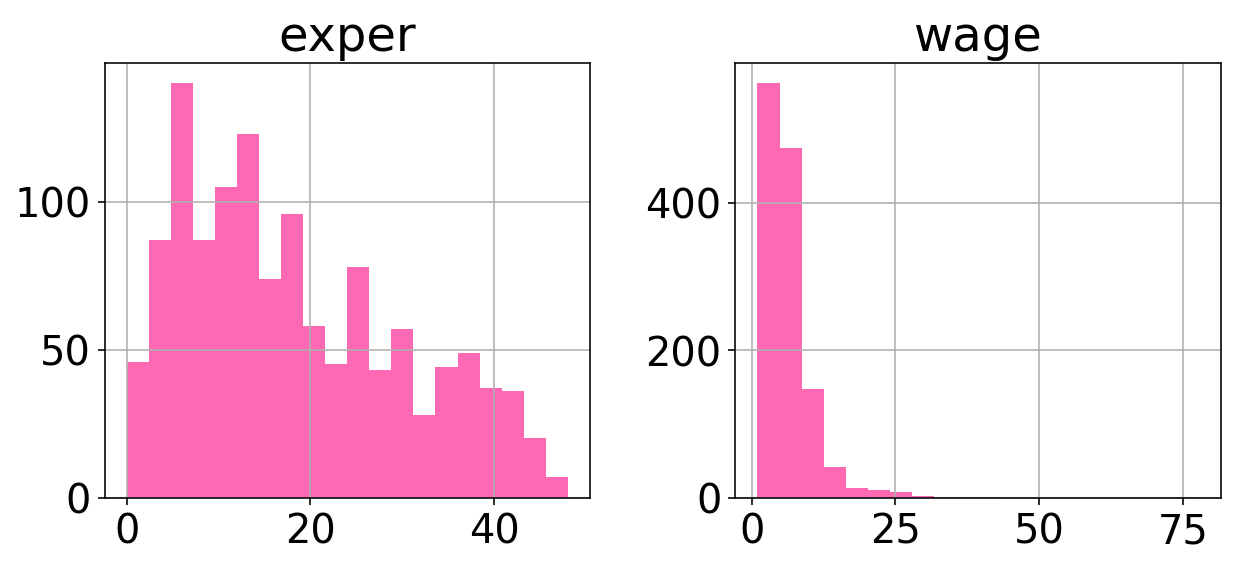

In [24]:
_ = df[['wage', 'exper']].hist(figsize=(10, 4), bins=20)

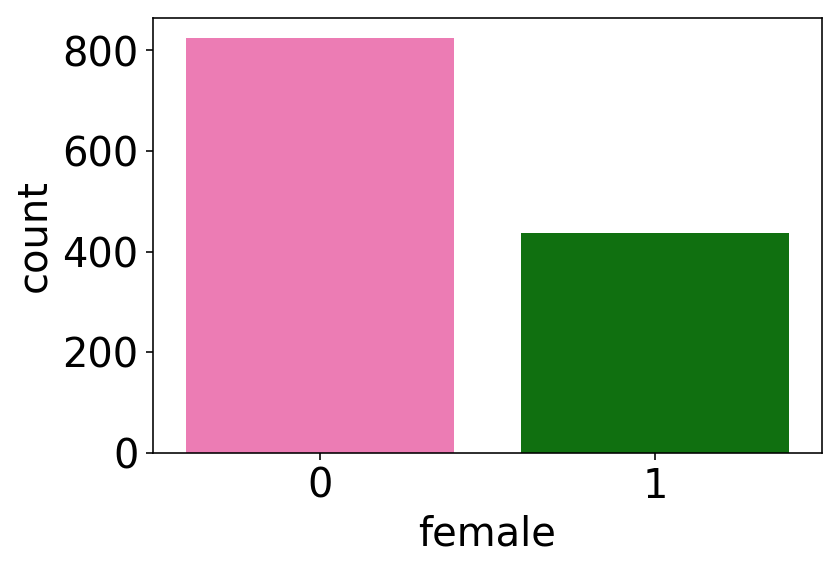

In [25]:
_ = sns.countplot(x='female', data=df)

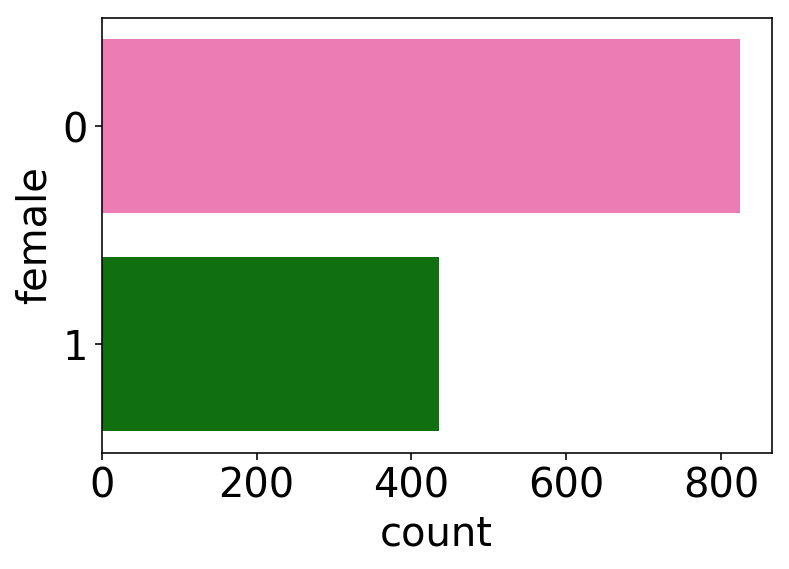

In [26]:
_ = sns.countplot(y='female', data=df)

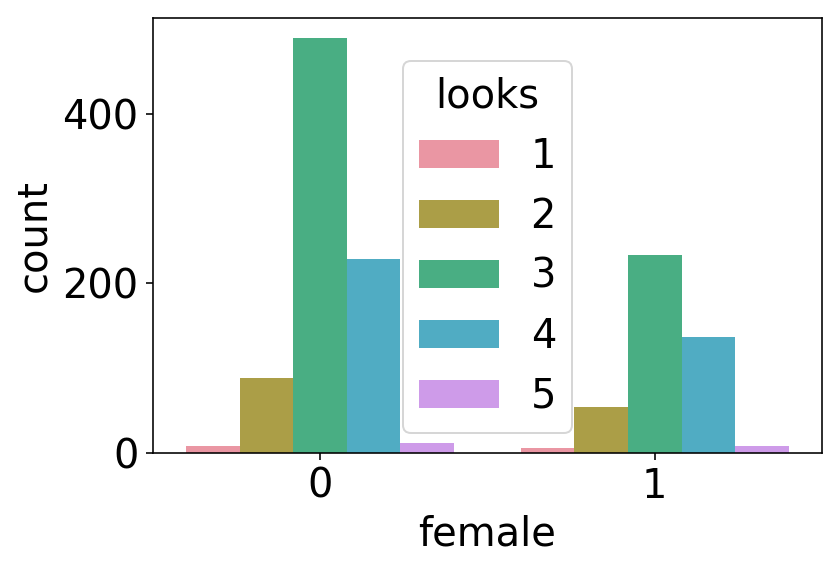

In [27]:
_ = sns.countplot(x='female', hue='looks', data=df)

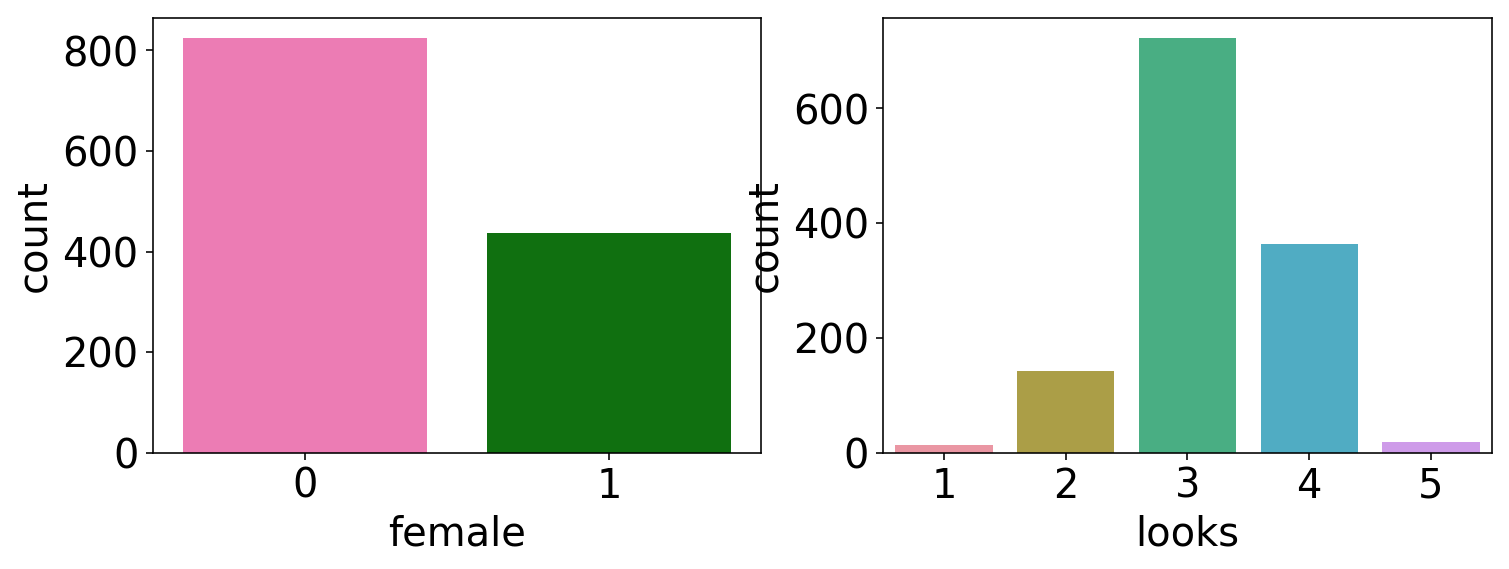

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='female', data=df, ax=axes[0])
sns.countplot(x='looks', data=df, ax=axes[1])

In [29]:
df.groupby('female')['wage'].count()

female
0    824
1    436
Name: wage, dtype: int64

In [30]:
type(df.groupby('female')['wage'].count())

pandas.core.series.Series

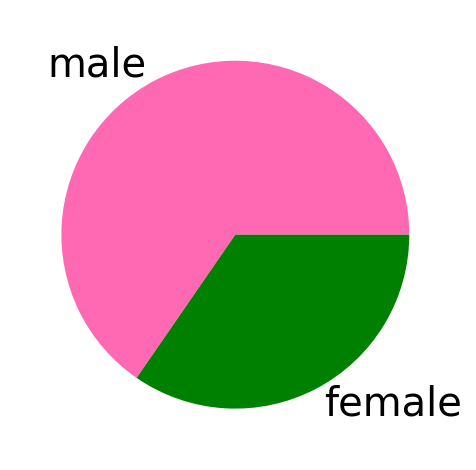

In [31]:
female_counts = df.groupby('female')['wage'].count()

sex_id_to_name = {0: 'male', 1: 'female'}

_ = plt.pie(
    female_counts,
    labels=[sex_id_to_name[i] for i in female_counts.index]
)

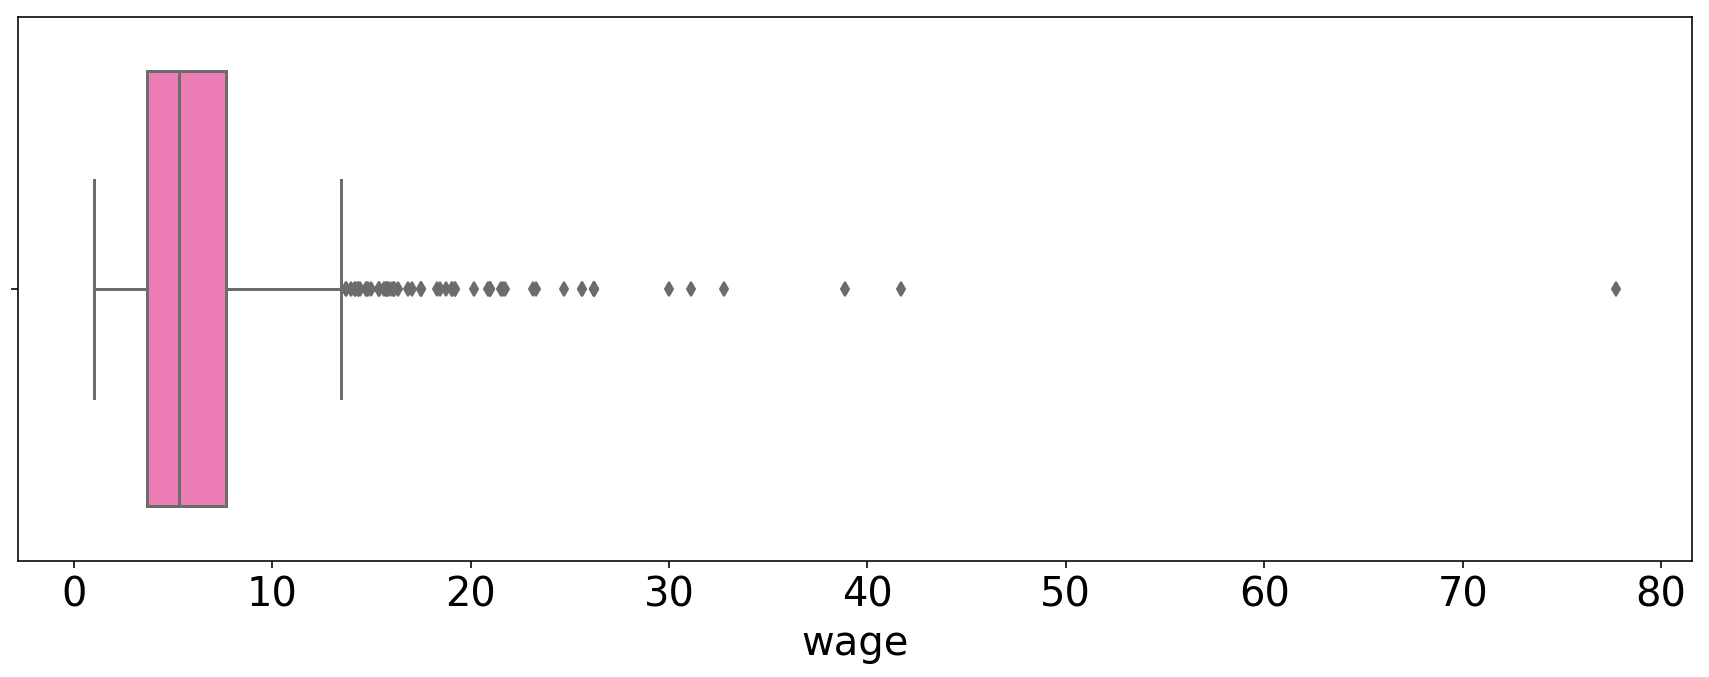

In [32]:
_ = plt.subplots(figsize=(15, 5))

sns.boxplot(x='wage', data=df)

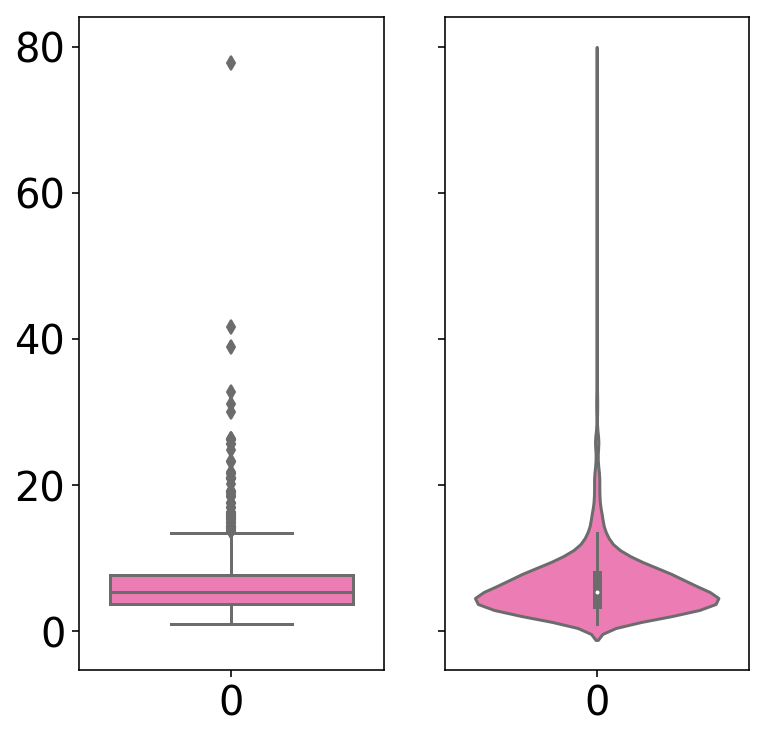

In [33]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 6))

sns.boxplot(data=df['wage'], ax=axes[0])
sns.violinplot(data=df['wage'], ax=axes[1])

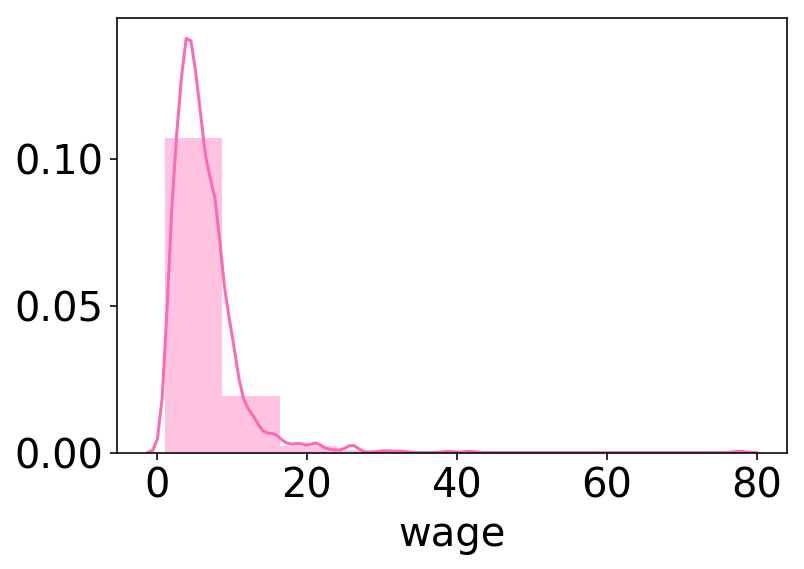

In [34]:
_ = sns.distplot(df['wage'], bins=10)

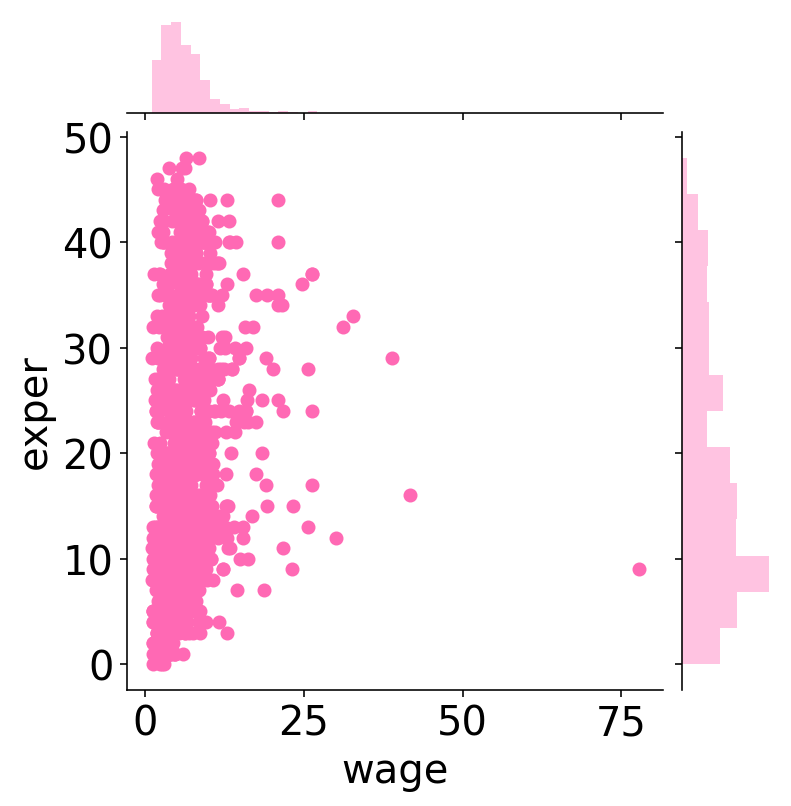

In [35]:
sns.jointplot(x='wage', y='exper', data=df, kind='scatter')

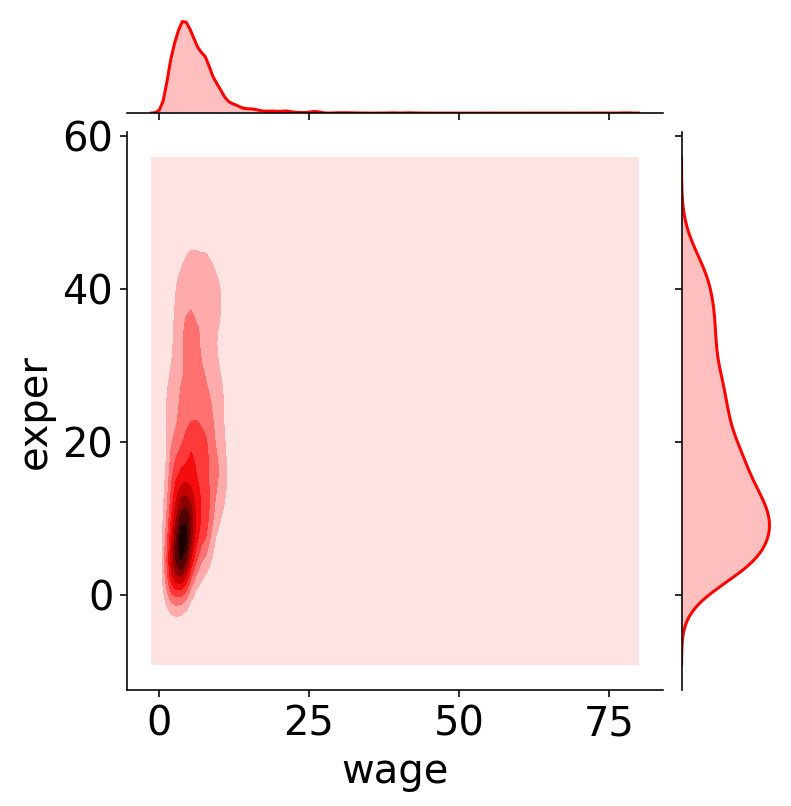

In [36]:
sns.jointplot(x='wage', y='exper', data=df, kind="kde", color="r")

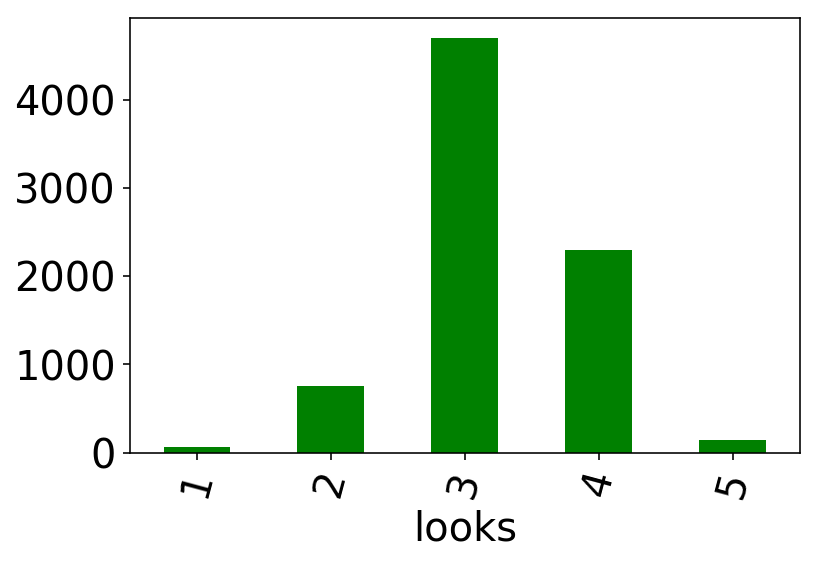

In [37]:
df.groupby('looks').wage.sum().plot(
    kind='bar', rot=75, color='#008000'
)

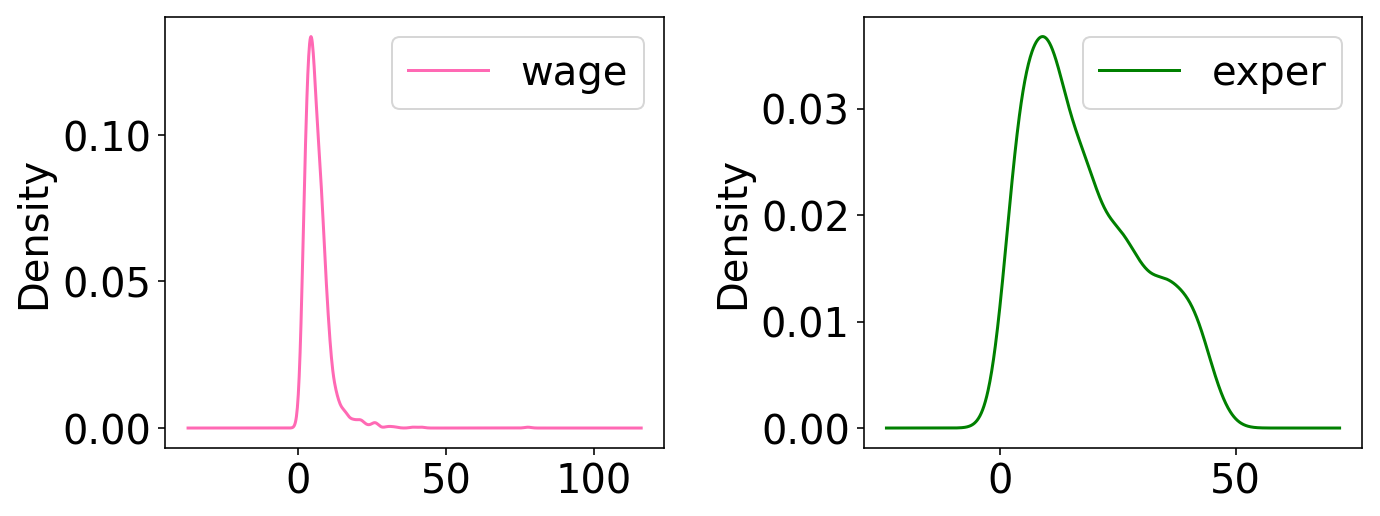

In [38]:
df[['wage', 'exper']].plot(
    kind='density',
    subplots=True,
    layout=(1, 2),
    sharex=False,
    figsize=(10, 4)
)

plt.tight_layout()